In [1]:
import pandas as pd

In [3]:
df_bus_card_tot = pd.read_csv("./02_data_통합본/df_bus_card_tot.csv")

In [4]:
len(df_bus_card_tot)

1057872

In [6]:
df_bus_card_tot.describe()

,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
count,1.057872e+06,1057872.0,1.057872e+06,1.057872e+06,1.057872e+06,1.057872e+06
mean,1.603810e+01,2020.0,1.656265e+00,1.395636e+01,1.343262e+01,2.912286e+01
std,1.099314e+01,0.0,6.720862e-01,8.162766e+00,4.214838e+00,1.728338e+01
min,0.000000e+00,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,2020.0,1.000000e+00,7.000000e+00,1.000000e+01,1.400000e+01
50%,1.300000e+01,2020.0,2.000000e+00,1.500000e+01,1.300000e+01,2.900000e+01
75%,2.200000e+01,2020.0,2.000000e+00,2.000000e+01,1.700000e+01,4.400000e+01
max,5.900000e+01,2020.0,3.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01


In [7]:
df_bus_card_tot.head()

,승차시각,하차시각,승객구분,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-03-27 05:14:12,2020-03-27 05:17:14,일반,N,N,문덕사거리,성우오토모티브,3,2020,3,27,5,14
1,2020-03-27 05:15:14,2020-03-27 05:49:56,일반,N,N,준양주택3차,오거리,34,2020,3,27,5,15
2,2020-03-27 05:23:43,2020-03-27 05:46:59,일반,N,N,두호동주민센터,남구보건소,23,2020,3,27,5,23
3,2020-03-27 05:24:49,2020-03-27 05:54:12,일반,N,N,천마아파트,홈플러스,30,2020,3,27,5,24
4,2020-03-27 05:28:48,2020-03-27 05:52:31,일반,N,N,오천농협세계지점,죽도시장,24,2020,3,27,5,28


# 데이터 시각화 분석

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
import platform

plt.rc('font', family = 'Malgun Gothic')

In [10]:
# 1. 기준월 및 기준일자별 버스 이용량 분석 비교
# 사용할 분석요소 : 기준월, 기준일, 승객구분
# 사용할 함수 : 카운트(빈도)
df_bus_card_tot.head(1)

,승차시각,하차시각,승객구분,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-03-27 05:14:12,2020-03-27 05:17:14,일반,N,N,문덕사거리,성우오토모티브,3,2020,3,27,5,14


In [28]:
# 피봇 테이블 만들기
df_pivot=df_bus_card_tot.pivot_table(values = '승객구분',
                            index='기준월',
                            columns='기준일',
                            aggfunc='count')
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,21,22,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,18738.0,16185.0,16614.0,12556.0,19054.0,15494.0,25976.0,15808.0,16788.0,NaN,...,17324.0,34494.0,9125.0,NaN,15562.0,5472.0,NaN,16046.0,31784.0,16202.0
2,11810.0,8547.0,NaN,15507.0,44757.0,NaN,15715.0,34113.0,NaN,31194.0,...,9084.0,5657.0,5938.0,4477.0,10694.0,5422.0,5491.0,3758.0,NaN,NaN
3,2402.0,6545.0,28485.0,11956.0,5830.0,12304.0,4114.0,2827.0,NaN,5345.0,...,NaN,NaN,NaN,131.0,2897.0,4983.0,3875.0,2484.0,NaN,4992.0


In [32]:
# 결측치 처리하기
df_pivot = df_pivot.fillna(0)
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,21,22,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,18738.0,16185.0,16614.0,12556.0,19054.0,15494.0,25976.0,15808.0,16788.0,0.0,...,17324.0,34494.0,9125.0,0.0,15562.0,5472.0,0.0,16046.0,31784.0,16202.0
2,11810.0,8547.0,0.0,15507.0,44757.0,0.0,15715.0,34113.0,0.0,31194.0,...,9084.0,5657.0,5938.0,4477.0,10694.0,5422.0,5491.0,3758.0,0.0,0.0
3,2402.0,6545.0,28485.0,11956.0,5830.0,12304.0,4114.0,2827.0,0.0,5345.0,...,0.0,0.0,0.0,131.0,2897.0,4983.0,3875.0,2484.0,0.0,4992.0


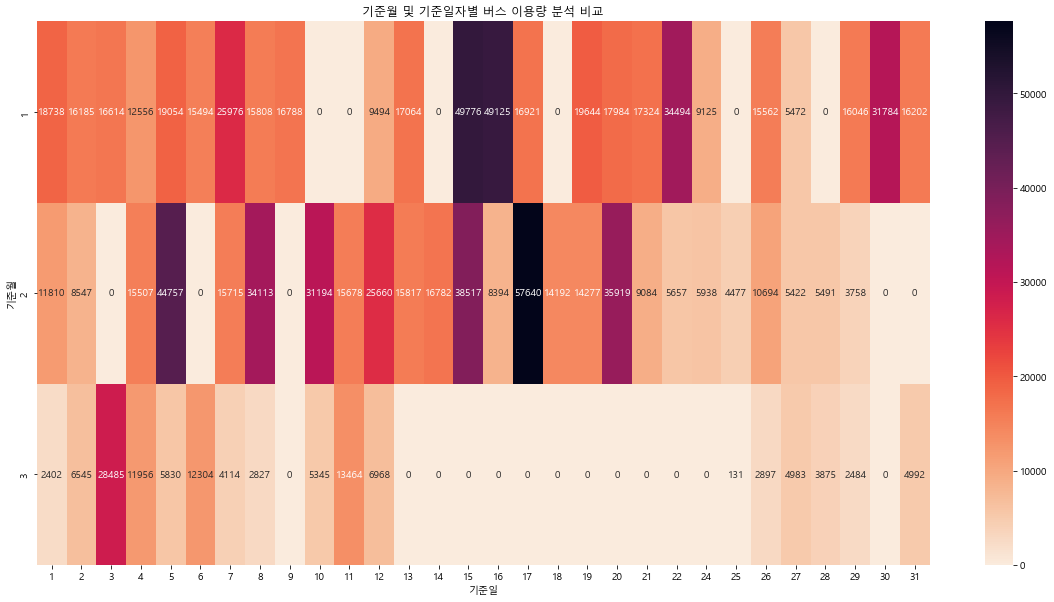

In [33]:
# 히트맵 그리기
plt.figure(figsize = (20, 10))
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")
plt.title("기준월 및 기준일자별 버스 이용량 분석 비교")
plt.show()

In [34]:
# 2. 기준일별 시간대별 버스 이용량 분석

In [35]:
df_pivot = df_bus_card_tot.pivot_table(values ='승객구분',
                                       index = '기준일',
                                       columns = '기준시간',
                                       aggfunc= 'count')
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,NaN,332.0,944.0,1184.0,2048.0,1849.0,2075.0,2287.0,2505.0,2500.0,2576.0,2618.0,2362.0,2385.0,2067.0,1561.0,1373.0,1228.0,867.0,189.0
2,NaN,200.0,684.0,1424.0,2103.0,2139.0,2119.0,2301.0,2295.0,2420.0,2416.0,2538.0,2297.0,2242.0,1889.0,1203.0,1085.0,1009.0,762.0,151.0
3,NaN,413.0,1356.0,2693.0,3359.0,3154.0,3195.0,3263.0,3148.0,3331.0,3351.0,3475.0,3319.0,3026.0,2863.0,1597.0,1239.0,1143.0,967.0,207.0
4,NaN,322.0,1163.0,2215.0,2725.0,2640.0,2805.0,2878.0,3025.0,3012.0,2960.0,3111.0,3072.0,2946.0,2347.0,1410.0,1233.0,1155.0,824.0,176.0
5,NaN,511.0,1666.0,3247.0,4411.0,4588.0,4776.0,4915.0,5265.0,5456.0,5414.0,5663.0,5315.0,5033.0,4398.0,2651.0,2307.0,2315.0,1466.0,244.0
6,NaN,241.0,800.0,1638.0,2131.0,2146.0,1965.0,2090.0,1895.0,1993.0,2170.0,2185.0,1976.0,1901.0,1627.0,924.0,789.0,672.0,533.0,122.0
7,NaN,312.0,1129.0,2330.0,3191.0,3220.0,3103.0,3196.0,3215.0,3314.0,3531.0,3532.0,3467.0,3478.0,2926.0,1754.0,1491.0,1454.0,980.0,182.0
8,NaN,389.0,1074.0,2220.0,3158.0,3313.0,3456.0,4017.0,4090.0,4095.0,4084.0,4158.0,3901.0,3921.0,3387.0,2152.0,1951.0,1818.0,1278.0,286.0
9,NaN,110.0,341.0,810.0,1120.0,1227.0,1109.0,1238.0,1267.0,1361.0,1361.0,1349.0,1273.0,1197.0,1002.0,556.0,541.0,508.0,343.0,75.0


In [36]:
# 결측치 처리하기
df_pivot = df_pivot.fillna(0)
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.0,332.0,944.0,1184.0,2048.0,1849.0,2075.0,2287.0,2505.0,2500.0,2576.0,2618.0,2362.0,2385.0,2067.0,1561.0,1373.0,1228.0,867.0,189.0
2,0.0,200.0,684.0,1424.0,2103.0,2139.0,2119.0,2301.0,2295.0,2420.0,2416.0,2538.0,2297.0,2242.0,1889.0,1203.0,1085.0,1009.0,762.0,151.0
3,0.0,413.0,1356.0,2693.0,3359.0,3154.0,3195.0,3263.0,3148.0,3331.0,3351.0,3475.0,3319.0,3026.0,2863.0,1597.0,1239.0,1143.0,967.0,207.0
4,0.0,322.0,1163.0,2215.0,2725.0,2640.0,2805.0,2878.0,3025.0,3012.0,2960.0,3111.0,3072.0,2946.0,2347.0,1410.0,1233.0,1155.0,824.0,176.0
5,0.0,511.0,1666.0,3247.0,4411.0,4588.0,4776.0,4915.0,5265.0,5456.0,5414.0,5663.0,5315.0,5033.0,4398.0,2651.0,2307.0,2315.0,1466.0,244.0
6,0.0,241.0,800.0,1638.0,2131.0,2146.0,1965.0,2090.0,1895.0,1993.0,2170.0,2185.0,1976.0,1901.0,1627.0,924.0,789.0,672.0,533.0,122.0
7,0.0,312.0,1129.0,2330.0,3191.0,3220.0,3103.0,3196.0,3215.0,3314.0,3531.0,3532.0,3467.0,3478.0,2926.0,1754.0,1491.0,1454.0,980.0,182.0
8,0.0,389.0,1074.0,2220.0,3158.0,3313.0,3456.0,4017.0,4090.0,4095.0,4084.0,4158.0,3901.0,3921.0,3387.0,2152.0,1951.0,1818.0,1278.0,286.0
9,0.0,110.0,341.0,810.0,1120.0,1227.0,1109.0,1238.0,1267.0,1361.0,1361.0,1349.0,1273.0,1197.0,1002.0,556.0,541.0,508.0,343.0,75.0


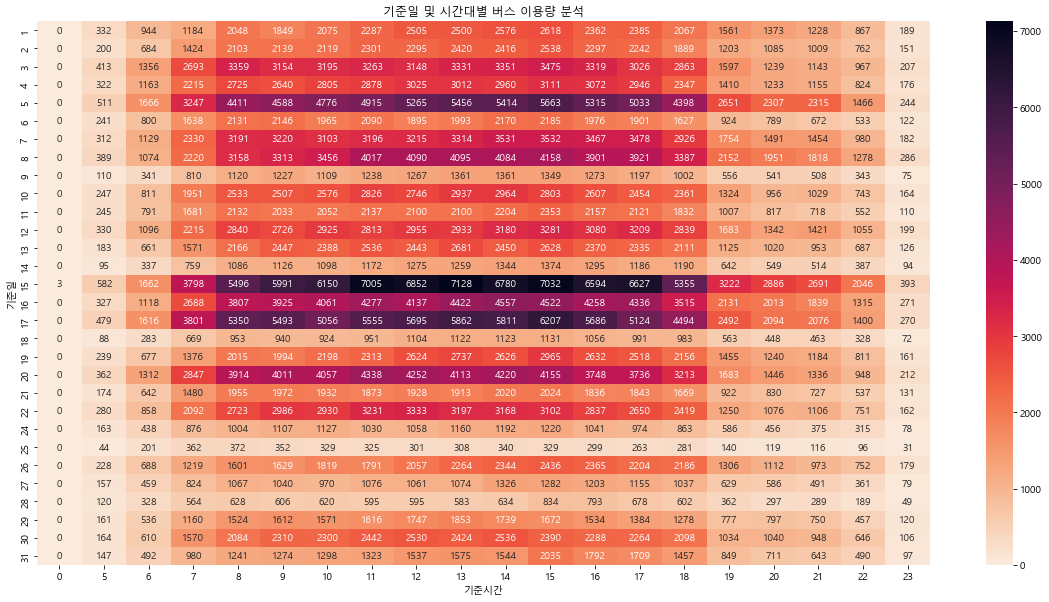

In [42]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")
plt.title('기준일 및 시간대별 버스 이용량 분석')
plt.show()

In [43]:
# 3. 기준시간 및 분별 버스 이용량 분석

In [44]:
df_pivot = df_bus_card_tot.pivot_table(values='승객구분',
                                       index = '기준시간',
                                       columns = '기준시간(분)',
                                       aggfunc= 'count')
df_pivot

기준시간(분),0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
기준시간,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,215.0,341.0,238.0,250.0,247.0,315.0,244.0,291.0,358.0,316.0
6,300.0,308.0,253.0,281.0,327.0,305.0,296.0,329.0,302.0,446.0,...,505.0,608.0,481.0,441.0,527.0,459.0,500.0,502.0,603.0,579.0
7,532.0,531.0,508.0,562.0,443.0,567.0,566.0,579.0,771.0,586.0,...,1139.0,1193.0,1067.0,1020.0,938.0,956.0,1072.0,1394.0,1129.0,1493.0
8,1395.0,1132.0,1290.0,1312.0,1001.0,1481.0,1119.0,1024.0,1030.0,1141.0,...,1144.0,1056.0,1027.0,1237.0,1254.0,1136.0,1324.0,1360.0,1174.0,1282.0
9,1450.0,1375.0,1405.0,1258.0,1283.0,1424.0,1131.0,1217.0,1202.0,1034.0,...,1457.0,1160.0,1219.0,1089.0,963.0,1126.0,1018.0,1029.0,1249.0,1067.0
10,1196.0,986.0,1241.0,1051.0,1048.0,1211.0,1107.0,1193.0,1306.0,1141.0,...,1445.0,1289.0,1131.0,1518.0,1082.0,1165.0,1311.0,1273.0,1444.0,1522.0
11,1092.0,1404.0,1281.0,1088.0,1454.0,1349.0,1299.0,1463.0,1306.0,1244.0,...,1308.0,1126.0,1303.0,1227.0,1143.0,1608.0,1559.0,1411.0,1453.0,1268.0
12,1227.0,1275.0,1337.0,1416.0,1357.0,1398.0,1524.0,1401.0,1449.0,1310.0,...,1232.0,1279.0,1204.0,1240.0,1141.0,1262.0,1437.0,1166.0,1144.0,1554.0


In [55]:
# 결측치 처리하기
df_pivot = df_pivot.fillna(0)
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.0,21.710843,14.772246,15.277027,17.338867,15.647918,16.800000,17.109751,16.845908,17.180000,17.784550,17.393048,17.164691,16.491405,15.305273,14.370916,13.964312,12.712541,12.750865,10.153439
2,0.0,14.650000,14.558480,15.537921,16.352829,16.117812,15.932043,16.081704,16.325926,16.384711,16.154801,15.933806,15.930779,17.556646,15.693489,14.415628,13.720737,13.304262,11.972441,9.569536
3,0.0,14.554479,15.534661,15.856294,15.917237,15.894737,16.185915,15.695066,15.729352,16.070549,15.727246,15.071942,14.906297,16.061798,15.580859,13.922354,12.820016,12.872266,12.488108,10.014493
4,0.0,16.394410,15.446260,15.372460,16.575413,16.379924,16.125847,16.105281,15.920992,16.353254,16.124662,16.139505,15.471029,16.833673,15.612271,14.821986,13.865369,13.143723,12.648058,10.198864
5,0.0,15.064579,15.180672,16.056052,16.718885,16.599608,16.045854,16.135707,16.233428,16.123167,15.569634,16.084054,15.786830,16.718657,16.397681,14.632214,13.683138,12.720086,12.417462,10.651639
6,0.0,16.385892,15.122500,16.230159,16.403097,16.595993,16.226463,16.134450,15.661741,16.444556,15.808756,15.741876,15.320344,16.774855,15.689613,13.978355,13.508238,13.395833,12.003752,9.327869
7,0.0,15.852564,15.549159,16.422318,16.337198,16.315217,16.422494,16.807259,16.421773,16.363005,16.611442,15.803794,15.369195,16.592582,15.737867,14.322691,13.657948,13.309491,13.004082,9.879121
8,0.0,15.670951,14.215084,15.653153,16.152312,16.775128,16.836227,16.607916,16.855990,17.203663,16.659647,16.327561,16.259677,16.732466,16.088869,15.053903,13.357765,13.211221,12.313772,9.139860
9,0.0,16.063636,16.454545,15.976543,17.133929,17.267319,17.052299,16.945073,17.046567,16.717120,16.838354,16.511490,16.249018,18.003342,16.143713,14.147482,14.075786,13.208661,13.282799,9.946667


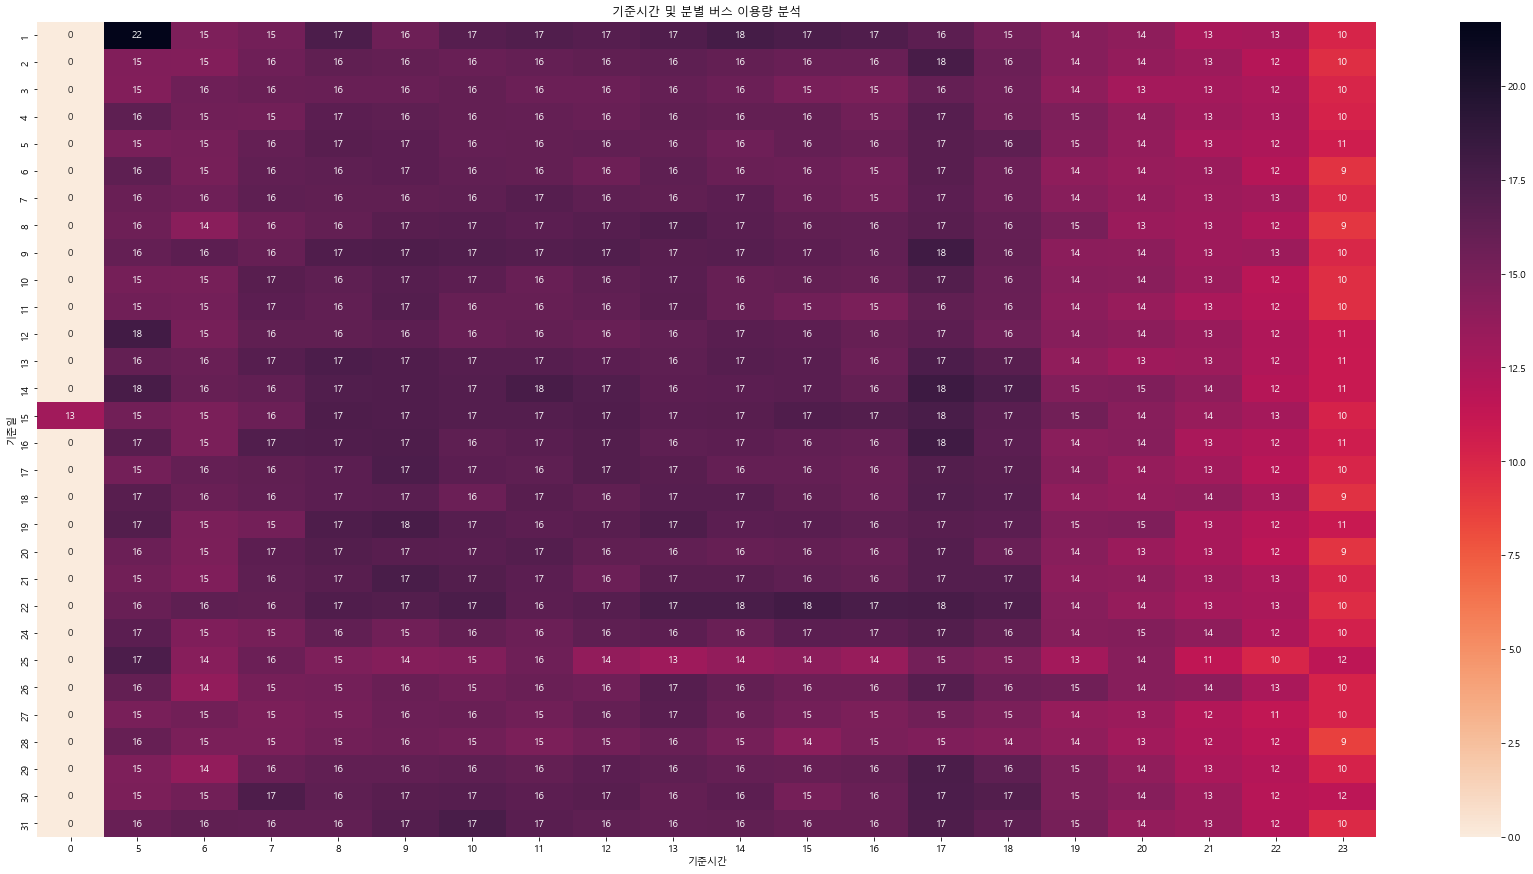

In [56]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")
plt.title('기준시간 및 분별 버스 이용량 분석')
plt.show()

In [50]:
# 4. 기준일별 시간대별 버스내체류시간(분) 분석

In [52]:
df_pivot = df_bus_card_tot.pivot_table(values = '버스내체류시간(분)',
                                       index = '기준일',
                                       columns = '기준시간',
                                       aggfunc = 'mean')
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,NaN,21.710843,14.772246,15.277027,17.338867,15.647918,16.800000,17.109751,16.845908,17.180000,17.784550,17.393048,17.164691,16.491405,15.305273,14.370916,13.964312,12.712541,12.750865,10.153439
2,NaN,14.650000,14.558480,15.537921,16.352829,16.117812,15.932043,16.081704,16.325926,16.384711,16.154801,15.933806,15.930779,17.556646,15.693489,14.415628,13.720737,13.304262,11.972441,9.569536
3,NaN,14.554479,15.534661,15.856294,15.917237,15.894737,16.185915,15.695066,15.729352,16.070549,15.727246,15.071942,14.906297,16.061798,15.580859,13.922354,12.820016,12.872266,12.488108,10.014493
4,NaN,16.394410,15.446260,15.372460,16.575413,16.379924,16.125847,16.105281,15.920992,16.353254,16.124662,16.139505,15.471029,16.833673,15.612271,14.821986,13.865369,13.143723,12.648058,10.198864
5,NaN,15.064579,15.180672,16.056052,16.718885,16.599608,16.045854,16.135707,16.233428,16.123167,15.569634,16.084054,15.786830,16.718657,16.397681,14.632214,13.683138,12.720086,12.417462,10.651639
6,NaN,16.385892,15.122500,16.230159,16.403097,16.595993,16.226463,16.134450,15.661741,16.444556,15.808756,15.741876,15.320344,16.774855,15.689613,13.978355,13.508238,13.395833,12.003752,9.327869
7,NaN,15.852564,15.549159,16.422318,16.337198,16.315217,16.422494,16.807259,16.421773,16.363005,16.611442,15.803794,15.369195,16.592582,15.737867,14.322691,13.657948,13.309491,13.004082,9.879121
8,NaN,15.670951,14.215084,15.653153,16.152312,16.775128,16.836227,16.607916,16.855990,17.203663,16.659647,16.327561,16.259677,16.732466,16.088869,15.053903,13.357765,13.211221,12.313772,9.139860
9,NaN,16.063636,16.454545,15.976543,17.133929,17.267319,17.052299,16.945073,17.046567,16.717120,16.838354,16.511490,16.249018,18.003342,16.143713,14.147482,14.075786,13.208661,13.282799,9.946667


In [53]:
# 결측치 처리
df_pivot = df_pivot.fillna(0)

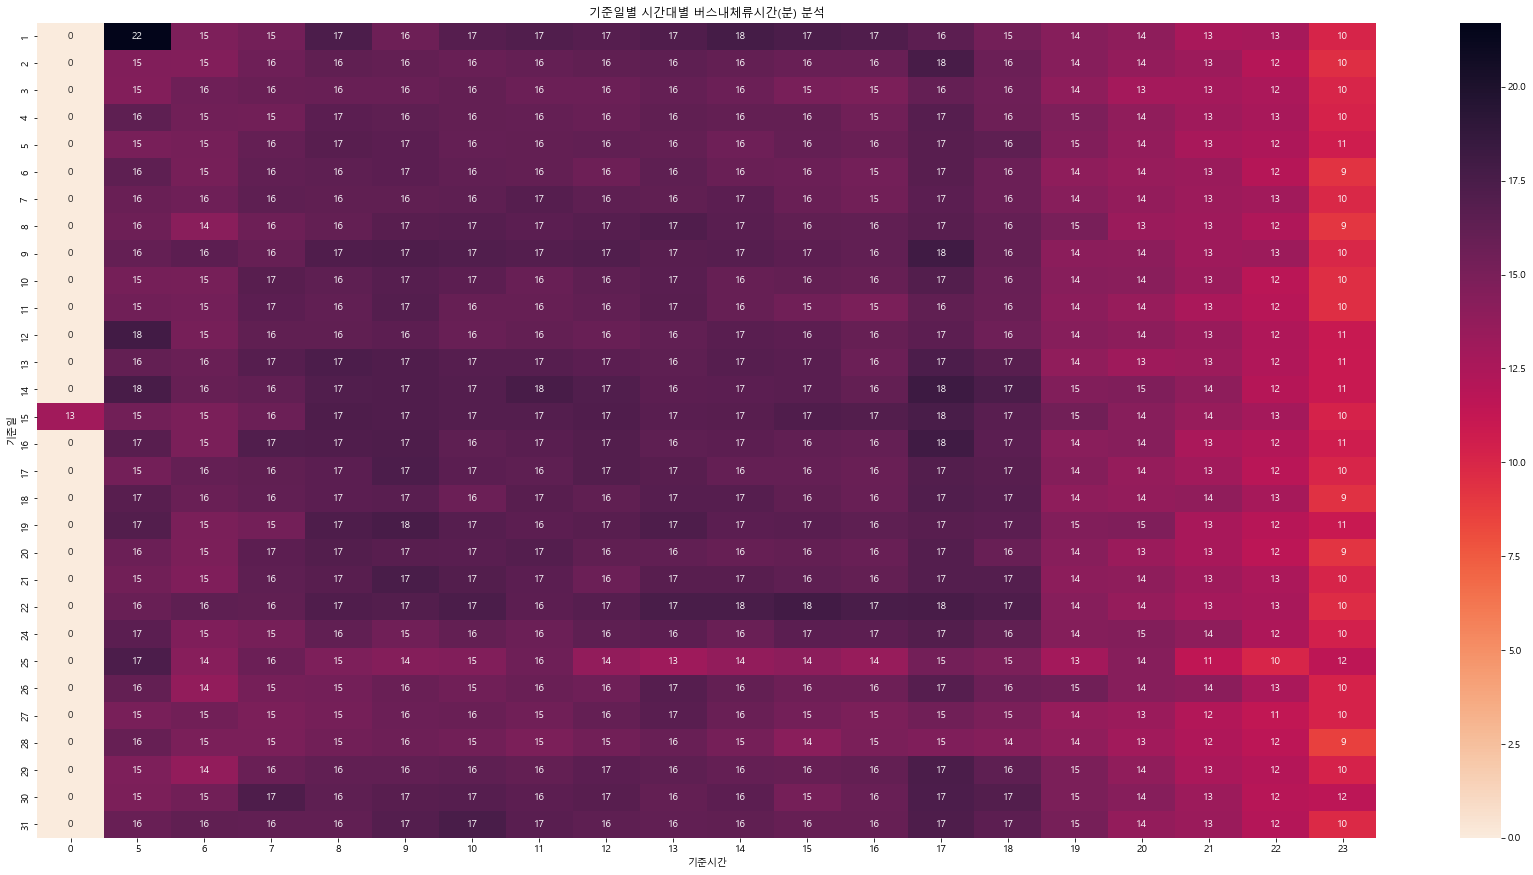

In [54]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")
plt.title('기준일별 시간대별 버스내체류시간(분) 분석')
plt.show()

In [57]:
# 5. 시간대별 승객구분별 버스내 체류시간(분) 분석
# 승객구분은 범주형이니까 막대그래프 그리기

In [58]:
df_temp = pd.DataFrame()
df_temp['기준시간'] = df_bus_card_tot['기준시간']
df_temp['승객구분'] = df_bus_card_tot['승객구분']
df_temp['버스내체류시간'] = df_bus_card_tot['버스내체류시간(분)']

df_temp

,기준시간,승객구분,버스내체류시간
0,5,일반,3
1,5,일반,34
2,5,일반,23
3,5,일반,30
4,5,일반,24
...,...,...,...
1057867,23,일반,11
1057868,23,일반,8
1057869,23,일반,1
1057870,23,일반,7


In [59]:
df_temp.drop_duplicates(['승객구분'])

,기준시간,승객구분,버스내체류시간
0,5,일반,3
97,6,청소년,0
133,6,None,8
265,7,어린이,7


In [61]:
# 5. 시간대별 승객구분별 버스내 체류시간(분) 분석
df_temp2 = (df_temp.groupby(['기준시간','승객구분'], as_index=False).sum()).sort_values(by=['버스내체류시간'], ascending = False)

In [63]:
df_temp2.head(10)

,기준시간,승객구분,버스내체류시간
43,15,일반,1252395
39,14,일반,1228199
35,13,일반,1219021
31,12,일반,1184269
27,11,일반,1175996
51,17,일반,1153803
19,9,일반,1146414
47,16,일반,1128590
23,10,일반,1126060
15,8,일반,1113955


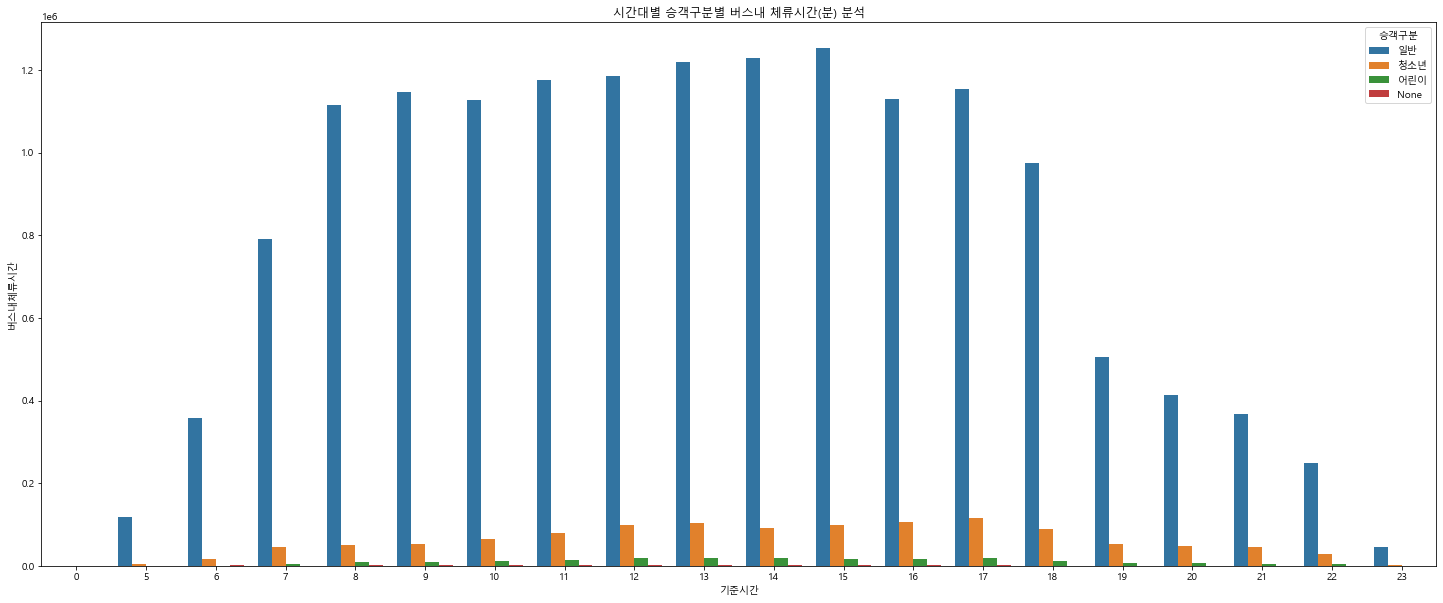

In [72]:
fig = plt.figure(figsize = (25, 10))
sns.barplot(x='기준시간', y='버스내체류시간', hue='승객구분', data=df_temp2)
plt.title("시간대별 승객구분별 버스내 체류시간(분) 분석")
plt.show()

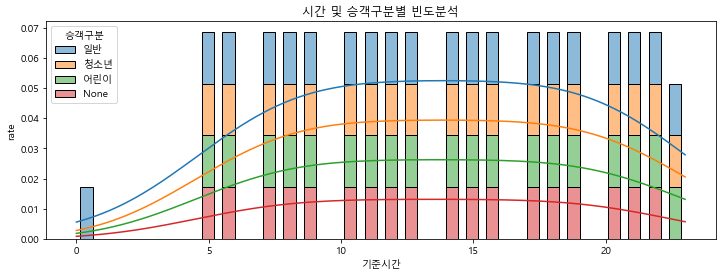

In [73]:
# 시간 및 승객구분별 빈도분석
plt.figure(figsize=(12,4))
g = sns.histplot(data = df_temp2, 
                 x = '기준시간',
                 bins = 30,          # bin의 개수
                 kde = True,         # 막대그래프에 선그리기
                 hue = '승객구분',   
                 multiple = 'stack', # dodge
                 stat = 'density',   # 비율로 확인하고자 할 때
                 shrink = 0.6)
plt.title('시간 및 승객구분별 빈도분석')
plt.xlabel('기준시간')
plt.ylabel('rate')
plt.show()

In [74]:
# 승하차정류장별 버스내 체류시간(분) 상위 30건 분석

In [75]:
df_bus_card_tot

,승차시각,하차시각,승객구분,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-03-27 05:14:12,2020-03-27 05:17:14,일반,N,N,문덕사거리,성우오토모티브,3,2020,3,27,5,14
1,2020-03-27 05:15:14,2020-03-27 05:49:56,일반,N,N,준양주택3차,오거리,34,2020,3,27,5,15
2,2020-03-27 05:23:43,2020-03-27 05:46:59,일반,N,N,두호동주민센터,남구보건소,23,2020,3,27,5,23
3,2020-03-27 05:24:49,2020-03-27 05:54:12,일반,N,N,천마아파트,홈플러스,30,2020,3,27,5,24
4,2020-03-27 05:28:48,2020-03-27 05:52:31,일반,N,N,오천농협세계지점,죽도시장,24,2020,3,27,5,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057867,2020-01-22 23:34:48,2020-01-22 23:45:19,일반,Y,N,창포사거리,삼구4차,11,2020,1,22,23,34
1057868,2020-01-22 23:39:05,2020-01-22 23:47:36,일반,Y,N,오거리,문화예술회관,8,2020,1,22,23,39
1057869,2020-01-22 23:39:07,2020-01-22 23:40:57,일반,N,N,롯데백화점,영일대 해수욕장,1,2020,1,22,23,39
1057870,2020-01-22 23:42:54,2020-01-22 23:49:54,일반,N,N,죽도파출소,롯데아파트,7,2020,1,22,23,42


In [82]:
df_temp = pd.DataFrame()

df_temp['승하차정류장'] = df_bus_card_tot['승차정류장'] + "-->" + df_bus_card_tot['하차정류장']
df_temp['승객구분'] =  df_bus_card_tot['승객구분']
df_temp['버스내체류시간'] = df_bus_card_tot['버스내체류시간(분)']
df_temp

,승하차정류장,승객구분,버스내체류시간
0,문덕사거리-->성우오토모티브,일반,3
1,준양주택3차-->오거리,일반,34
2,두호동주민센터-->남구보건소,일반,23
3,천마아파트-->홈플러스,일반,30
4,오천농협세계지점-->죽도시장,일반,24
...,...,...,...
1057867,창포사거리-->삼구4차,일반,11
1057868,오거리-->문화예술회관,일반,8
1057869,롯데백화점-->영일대 해수욕장,일반,1
1057870,죽도파출소-->롯데아파트,일반,7


In [87]:
# 승하차정류장(승차정류장 및 하차정류장)별 버스내체류시간 상위 30건 조회
# 승하차정류장 및 승객구분별로 버스내체류시간의 sum 구하기
df_temp_sel = (df_temp.groupby(['승하차정류장', '승객구분'], as_index=False).sum()).sort_values(by=['버스내체류시간'], ascending=False).head(30)
df_temp_sel

,승하차정류장,승객구분,버스내체류시간
19211,시외버스터미널-->죽도시장,일반,122143
37903,흥해환승센터-->죽도시장,일반,79367
29508,죽도시장-->흥해환승센터,일반,55265
37911,흥해환승센터-->중앙상가,일반,55092
10644,두호초등학교-->죽도시장,일반,46710
18745,시외버스터미널-->구룡포환승센터,일반,45828
27951,장성초등학교-->죽도시장,일반,44890
3512,구룡포근대화거리-->시외버스터미널,일반,42569
1989,경북자동차학원-->죽도시장,일반,42328
12096,문덕사거리-->시외버스터미널,일반,42082


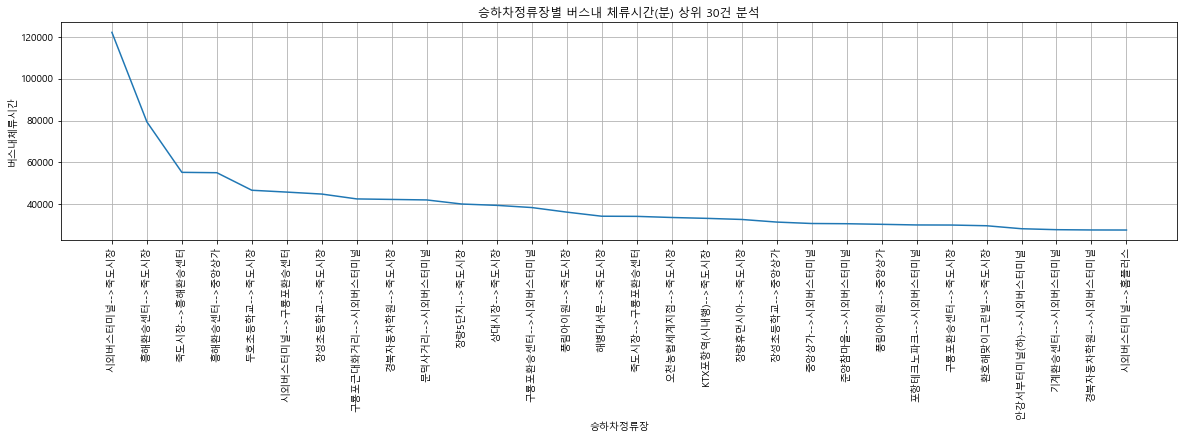

In [92]:
# 그래프 사이즈 지정
plt.figure(figsize=(20, 4))
# 데이터 x축, y축 넣기
plt.plot(df_temp_sel['승하차정류장'], df_temp_sel['버스내체류시간'])
# 그래프 제목
plt.title('승하차정류장별 버스내 체류시간(분) 상위 30건 분석')
# x축 제목
plt.xlabel('승하차정류장')
# y축 제목
plt.ylabel('버스내체류시간')
# x축 표시값을 90도 수직으로 표현
plt.xticks(rotation=90)
# 그래프 내에 그리드선 표시
plt.grid(True)
# 그래프 보기
plt.show()